In [42]:
library("data.table")
library(ggplot2)

In [0]:
dist_f1 <- data.table(read.table("dist_f1.txt",header=T))
dist_f2 <- data.table(read.table("dist_f2.txt",header=T))
data_fs1 <- data.table(read.table("data_fs1",header=T))
setnames(data_fs1,"function.","fun")
data_fs1[fun=="f0",psi:=phi]
data_fs1[fun=="f0",phi:=0]
data_nn1 <- data.table(read.table("data_nn1",header=T))
setnames(data_nn1,"function.","fun")

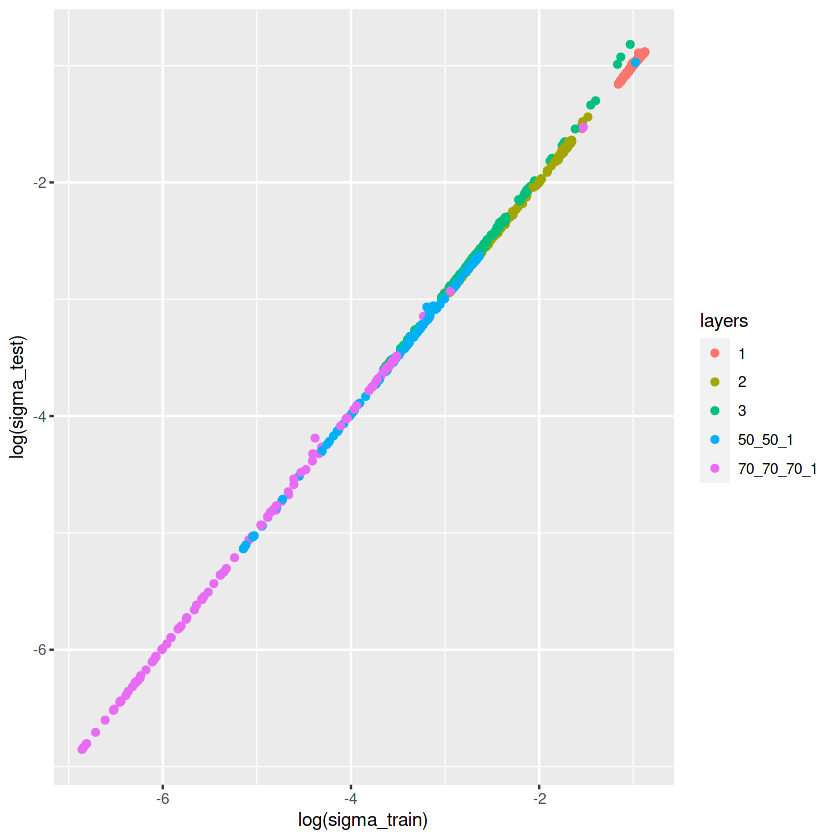

In [81]:
ggplot(rbind(data_fs1,data_nn1)) + geom_point(aes(x=log(sigma_train),y=log(sigma_test),color=layers))

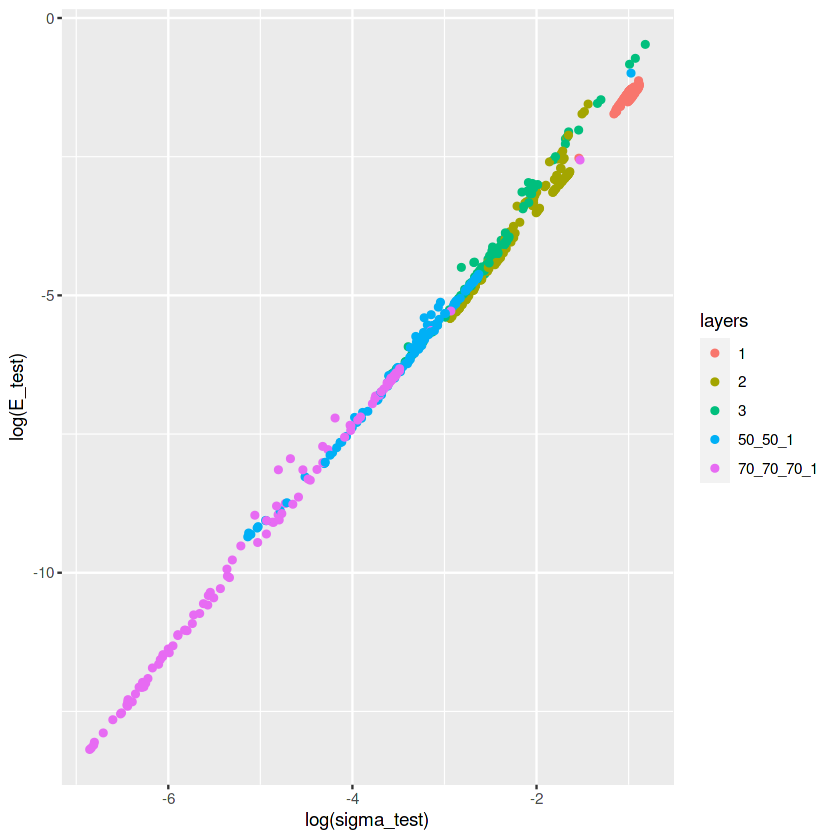

In [82]:
ggplot(rbind(data_fs1,data_nn1)) + geom_point(aes(x=log(sigma_test),y=log(E_test),color=layers))

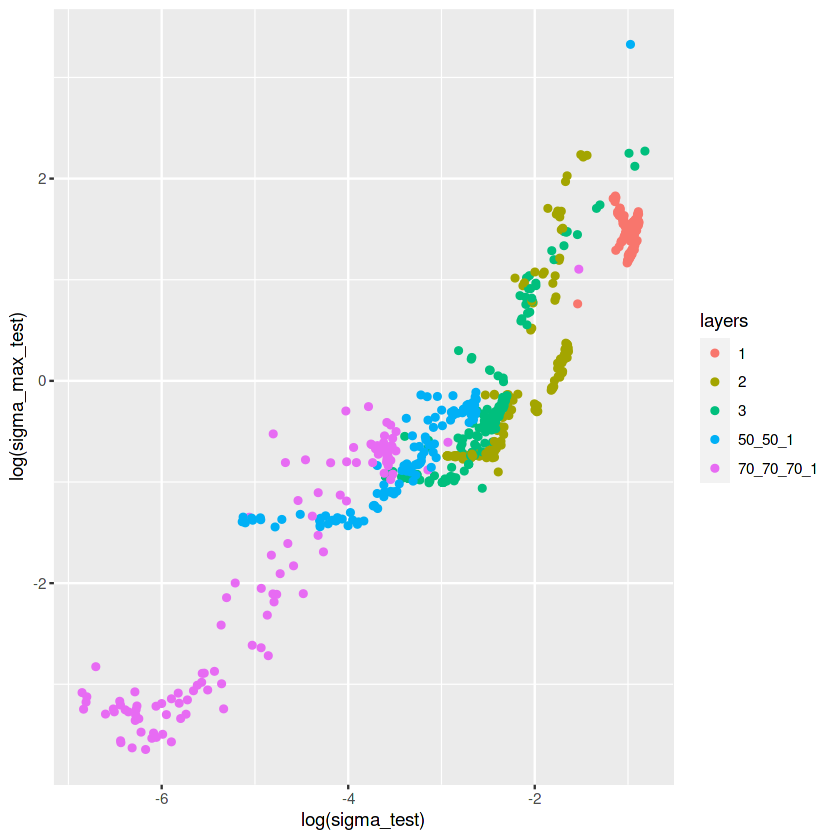

In [83]:
ggplot(rbind(data_fs1,data_nn1)) + geom_point(aes(x=log(sigma_test),y=log(sigma_max_test),color=layers))

In [91]:
d1 <- rbind(data_fs1,data_nn1)[fun=="f1"][dist_f1,on=c("psi","phi"),nomatch=NULL]
d2 <- rbind(data_fs1,data_nn1)[fun=="f2"][,alpha:=phi][,phi:=NULL][dist_f2,on=c("psi","alpha"),nomatch=NULL]

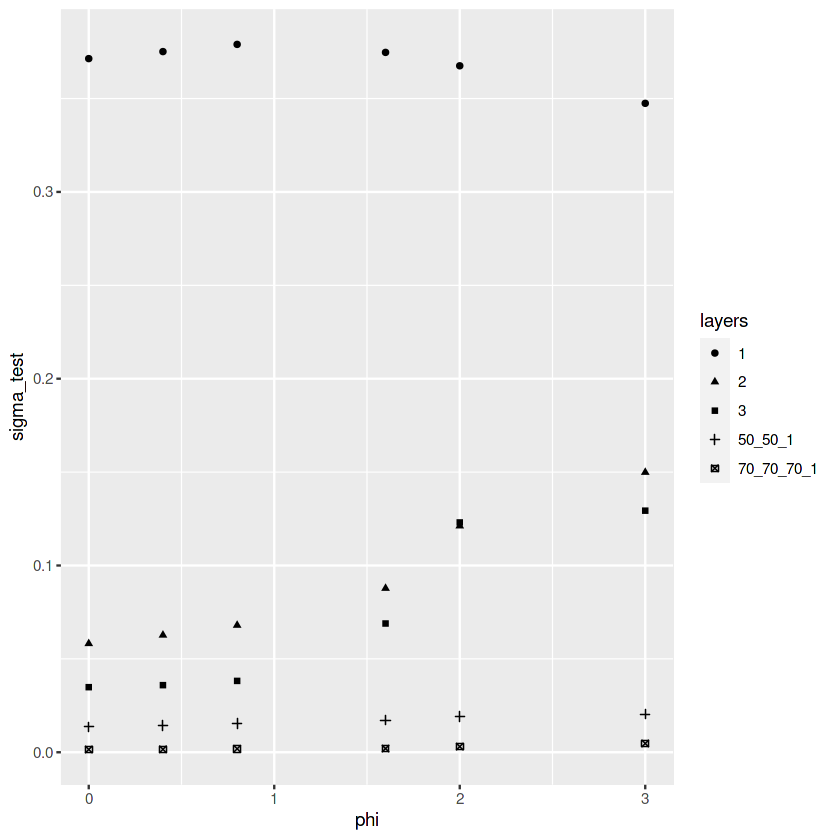

In [48]:
ggplot(d1[psi==1]) + geom_point(aes(x=phi,y=sigma_test,shape=layers))

Fit the FS results to the function A c^-k .
This is not absolutely necessary as the k=1 error is close to constant,
so it is a weighted average of the k=2 and k=3 errors.

In [55]:
data_fs1[fun=="f1" & psi==1 & phi==0.4]

layers,fun,psi,phi,train_time,sigma_train,sigma_test,E_train,E_test,sigma_max_train,sigma_max_test
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,f1,1,0.4,137.659,0.3728030,0.3751320,0.26765900,0.27192300,4.327550,4.635000
2,f1,1,0.4,175.220,0.0621009,0.0627216,0.00610542,0.00618989,0.448679,0.475012
3,f1,1,0.4,407.757,0.0341634,0.0359386,0.00227302,0.00242076,0.368515,0.397051


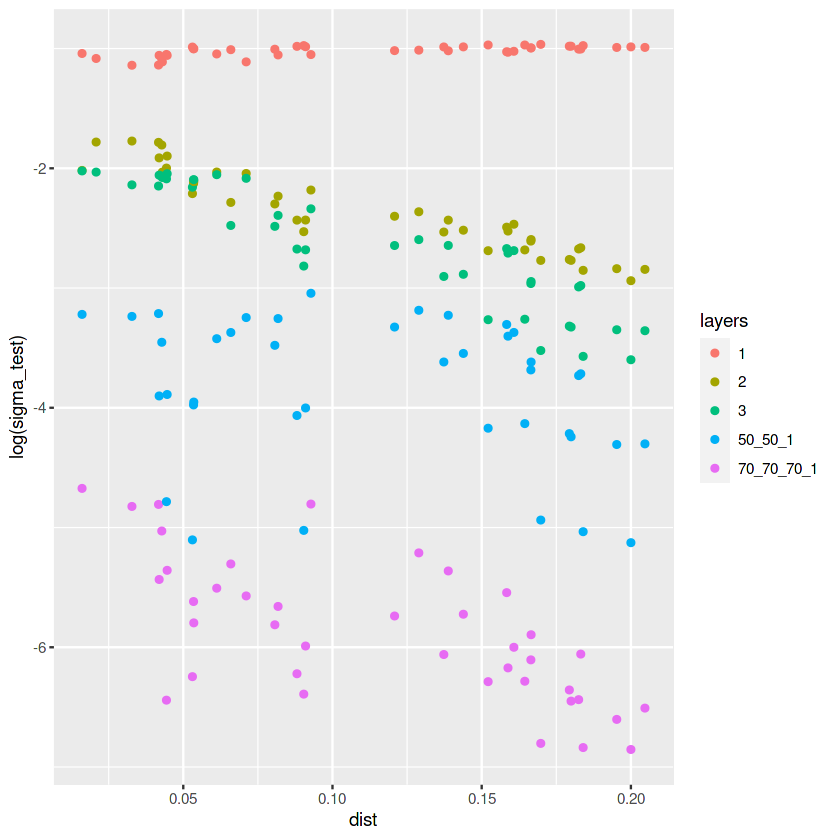

In [77]:
ggplot(d1) + geom_point(aes(x=dist,y=log(sigma_test),color=layers))

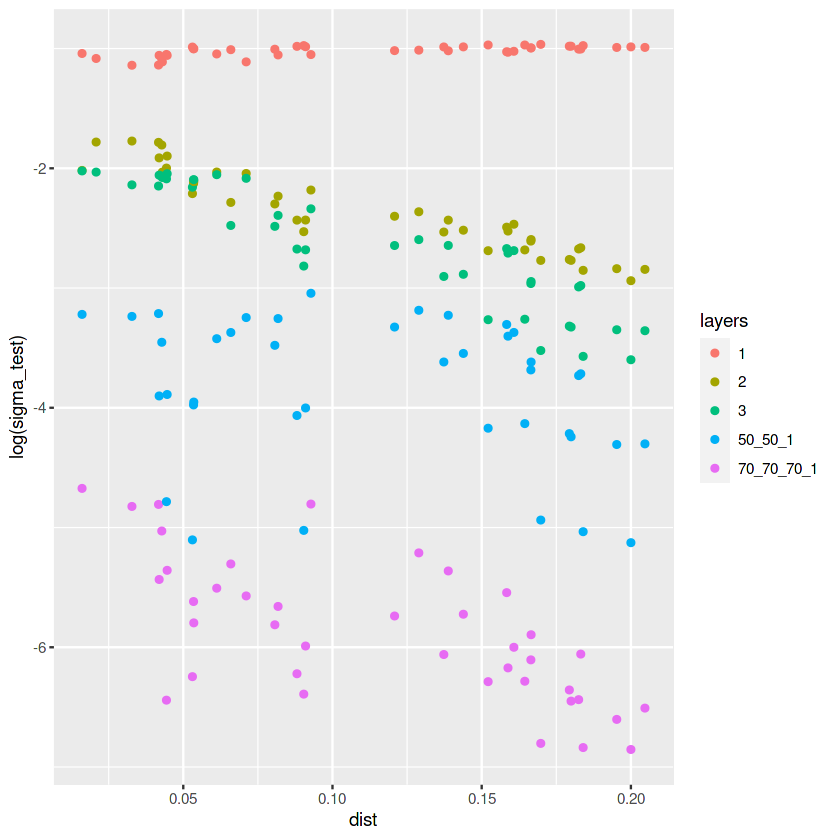

In [84]:
ggplot(d1) + geom_point(aes(x=dist,y=log(sigma_test),color=layers))

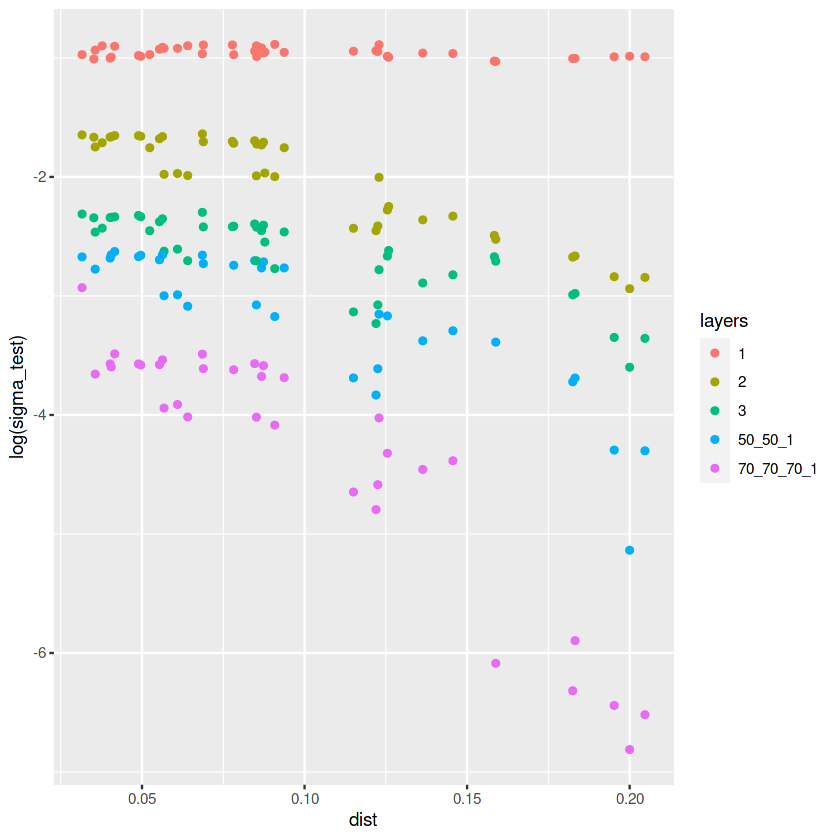

In [78]:
ggplot(d2) + geom_point(aes(x=dist,y=log(sigma_test),color=layers))

In [61]:
lm(data=data_fs1[fun=="f0" & psi==-0.4 & phi==0], I(log(sigma_test)) ~ layers)


Call:
lm(formula = I(log(sigma_test)) ~ layers, data = data_fs1[fun == 
    "f0" & psi == -0.4 & phi == 0])

Coefficients:
(Intercept)       layers  
    0.07354     -1.27794  


In [72]:
fsfit <- data_fs1[,as.list(lm(I(log(sigma_test)) ~ layers)$coefficients) ,by=c("fun","psi","phi")]
setnames(fsfit,"(Intercept)","intercept")

In [73]:
fsfit1 <- fsfit[fun=="f1"][dist_f1,on=c("psi","phi"),nomatch=NULL]
fsfit2 <- fsfit[fun=="f2"][,alpha:=phi][,phi:=NULL][dist_f2,on=c("psi","alpha"),nomatch=NULL]

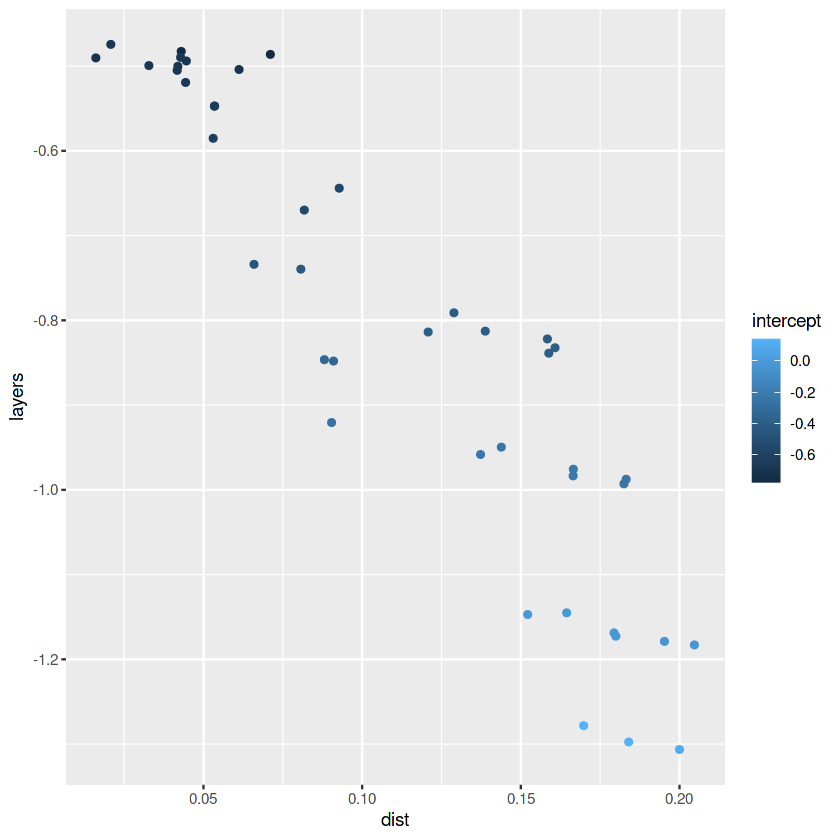

In [76]:
ggplot(fsfit1) + geom_point(aes(x=dist,y=layers,color=intercept))

In [85]:
fsfit1[1:3]

fun,psi,phi,intercept,layers,dist,i.fun
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
f1,-3,0.0,-0.4190541,-0.8219859,0.1583761,f1
f1,-3,0.4,-0.4063851,-0.8127682,0.1387996,f1
f1,-3,0.8,-0.4084928,-0.7911285,0.1289277,f1


Use FS results to estimate the optimal possible error for k=4 and k=8

In [98]:
fs_est <- rbind( fsfit[,list(layers="est4",sigma_test=exp(intercept+4*layers)),by=c("fun","psi","phi")],
              fsfit[,list(layers="est8",sigma_test=exp(intercept+8*layers)),by=c("fun","psi","phi")] )

In [88]:
fs_est[1:2]

fun,psi,phi,layers,sigma_test
<chr>,<dbl>,<dbl>,<chr>,<dbl>
f0,-0.4,0,est4,0.006485255
f0,-0.8,0,est4,0.007772794


In [99]:
df1 <- rbind(rbind(data_fs1,data_nn1)[fun=="f1",list(fun,psi,phi,layers,sigma_test)],fs_est[fun=="f1"])[dist_f1,on=c("psi","phi"),nomatch=NULL]
df2 <- rbind(rbind(data_fs1,data_nn1)[fun=="f2",list(fun,psi,phi,layers,sigma_test)],fs_est[fun=="f2"])[,alpha:=phi][,phi:=NULL][dist_f2,on=c("psi","alpha"),nomatch=NULL]

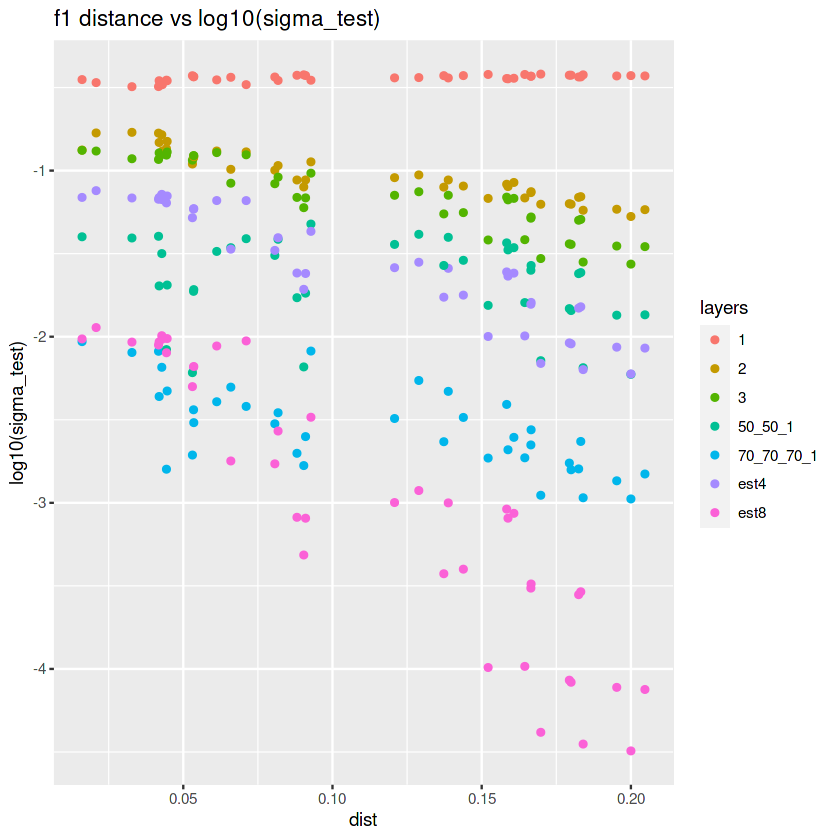

In [107]:
ggplot(df1) + geom_point(aes(x=dist,y=log10(sigma_test),color=layers)) + labs(title="f1 distance vs log10(sigma_test)")

In [108]:
postscript("df1_plot.ps")
ggplot(df1) + geom_point(aes(x=dist,y=log10(sigma_test),color=layers)) + labs(title="f1 distance vs log10(sigma_test)")
dev.off()

png 
  2

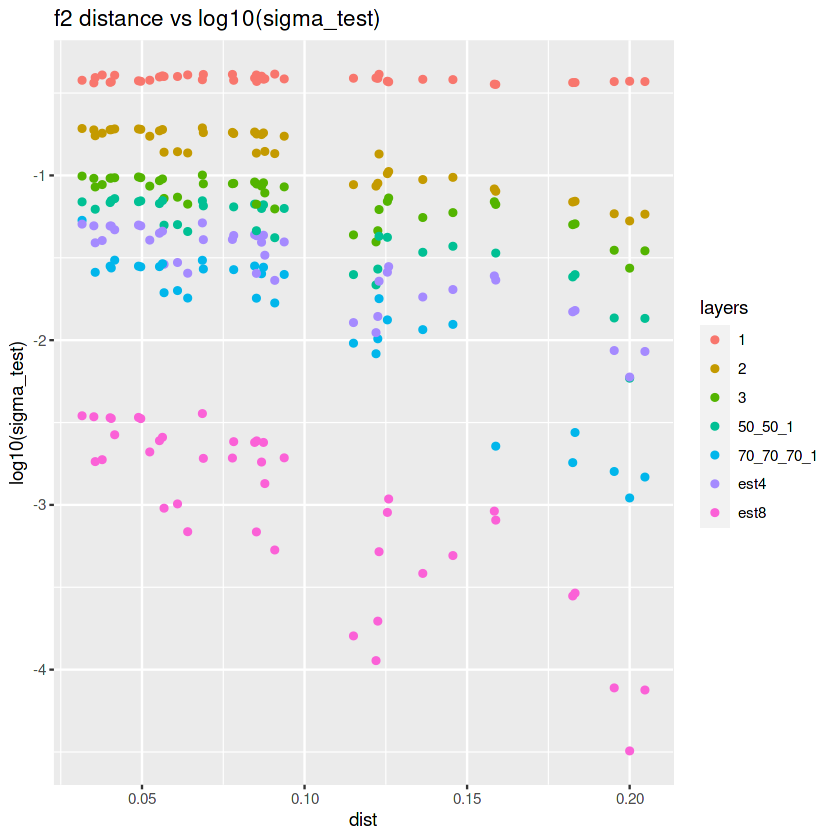

In [106]:
ggplot(df2) + geom_point(aes(x=dist,y=log10(sigma_test),color=layers)) + labs(title="f2 distance vs log10(sigma_test)")

In [109]:
postscript("df2_plot.ps")
ggplot(df2) + geom_point(aes(x=dist,y=log10(sigma_test),color=layers)) + labs(title="f2 distance vs log10(sigma_test)")
dev.off()

png 
  2